In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns = ['tweet_id', 'entity', 'sentiment', 'tweet_content']
data = pd.read_csv('data.csv', names=columns, header=None)
data.head()

,tweet_id,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
data.shape

(74682, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
data.isnull().sum()

tweet_id           0
entity             0
sentiment          0
tweet_content    686
dtype: int64

In [6]:
data.dropna(inplace=True)
data.isnull().sum()

tweet_id         0
entity           0
sentiment        0
tweet_content    0
dtype: int64

In [7]:
data.nunique()

tweet_id         12447
entity              32
sentiment            4
tweet_content    69491
dtype: int64

In [8]:
data.duplicated().sum()

2340

In [9]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [10]:
data.shape

(71656, 4)

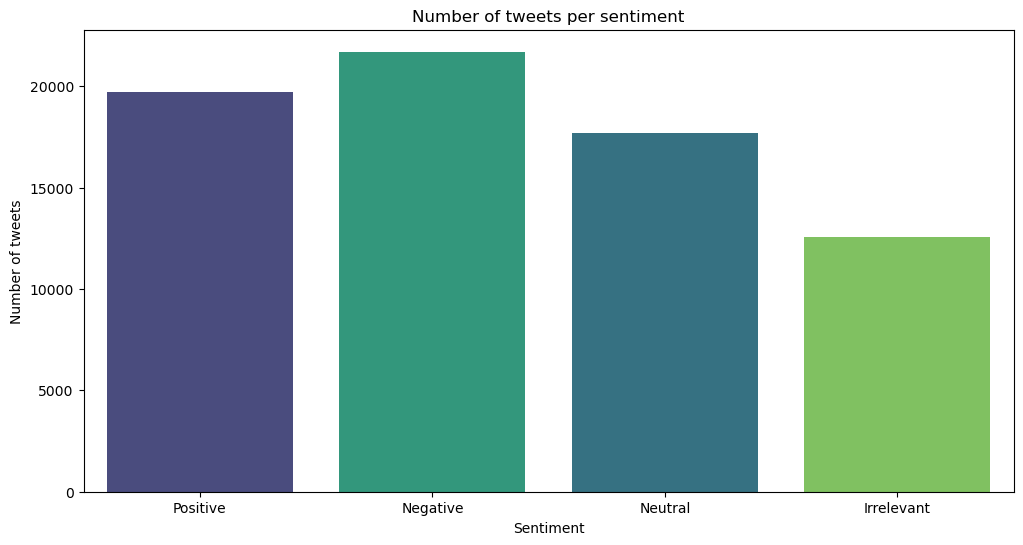

In [11]:
# sentiment distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x=data['sentiment'], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], hue=data['sentiment'], palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.title('Number of tweets per sentiment')
plt.show()

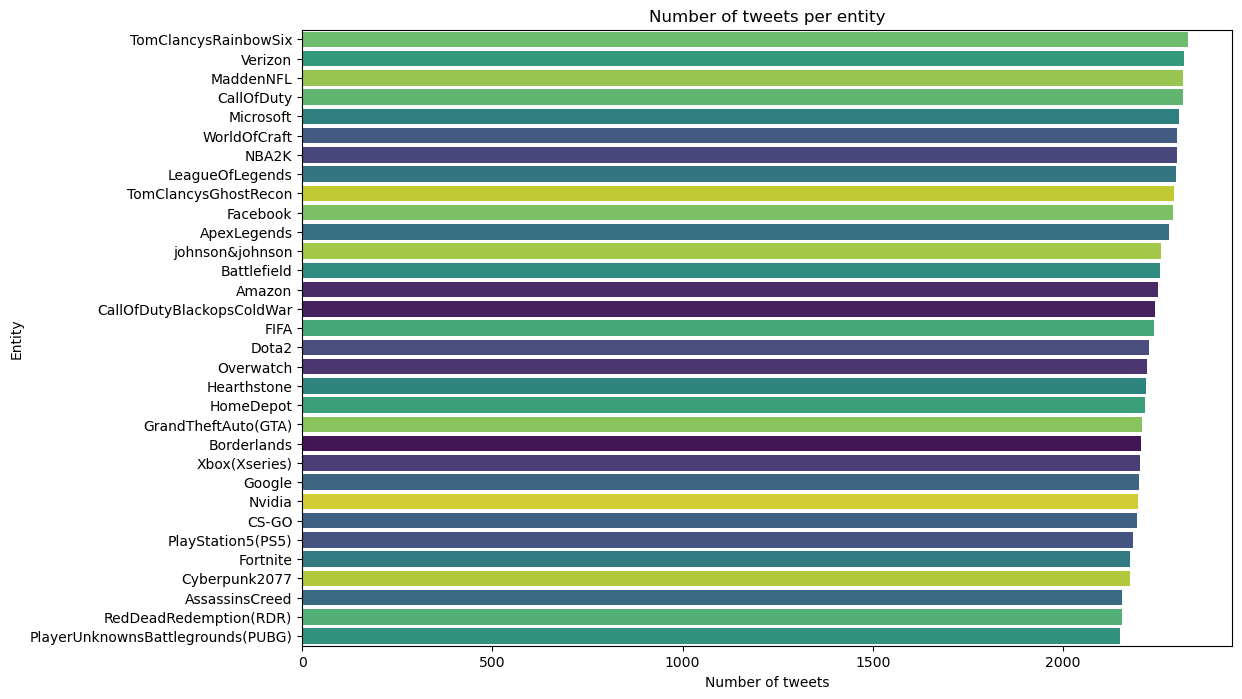

In [12]:
# tweets per entity
entity_count = data['entity'].value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=data, y=data['entity'], order=entity_count.index, palette='viridis', hue='entity')
plt.xlabel('Number of tweets')
plt.ylabel('Entity')
plt.title('Number of tweets per entity')
plt.show()

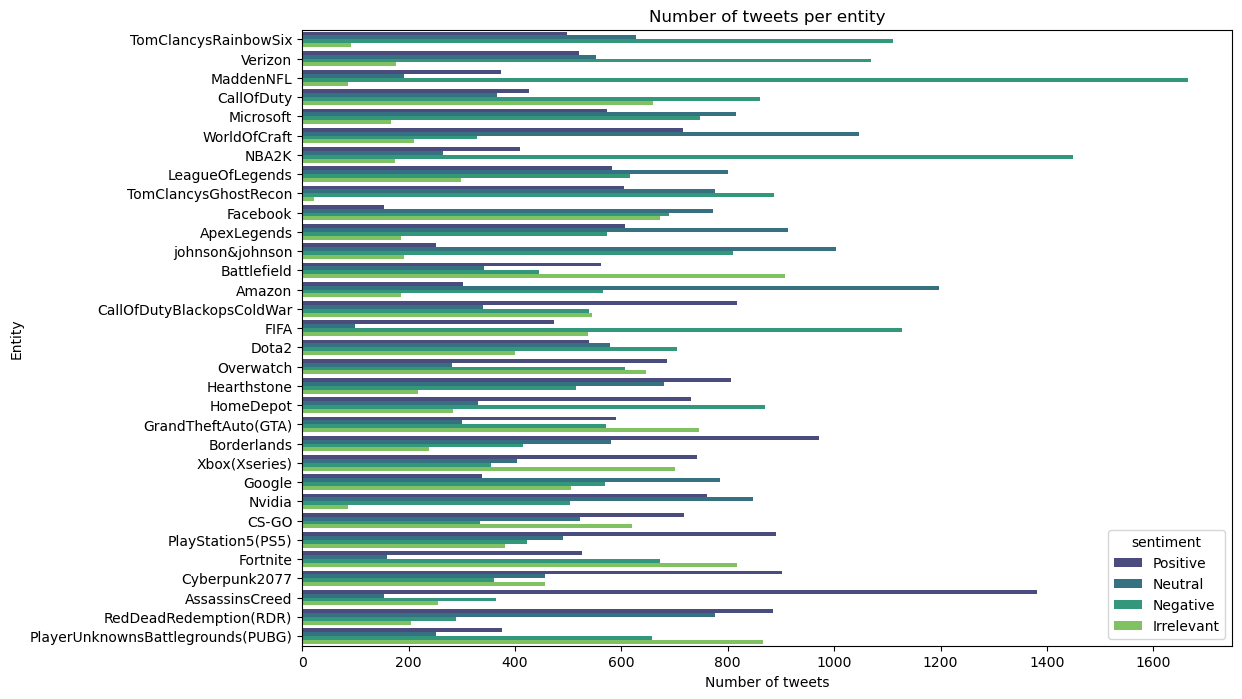

In [13]:
# sentiment distribution per entity
entity_count = data['entity'].value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=data, y=data['entity'], order=entity_count.index, palette='viridis', hue='sentiment')
plt.xlabel('Number of tweets')
plt.ylabel('Entity')
plt.title('Number of tweets per entity')
plt.show()

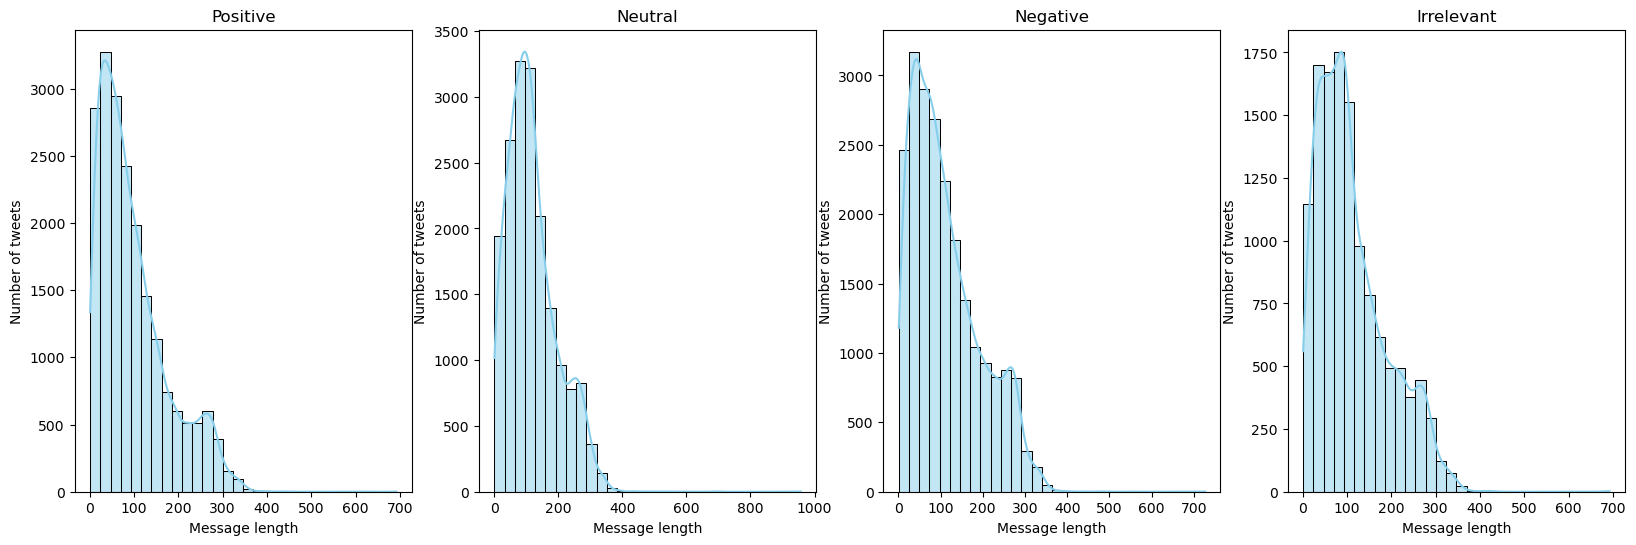

In [14]:
# message length distribution per sentiment
data['message_length'] = data['tweet_content'].apply(lambda x: len(x))

fig, ax = plt.subplots(1, 4, figsize=(20, 6))

for i, sentiment in enumerate(data['sentiment'].unique()):
    sns.histplot(data=data[data['sentiment'] == sentiment], x='message_length', ax=ax[i], color='skyblue', kde=True, bins=30)
    ax[i].set_title(sentiment)
    ax[i].set_xlabel('Message length')
    ax[i].set_ylabel('Number of tweets')

# plt.tight_layout()
plt.show()

/tmp/ipykernel_53038/3599128143.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=positive_tweets, y=positive_tweets['entity'], order=entity_count.index, palette='viridis')


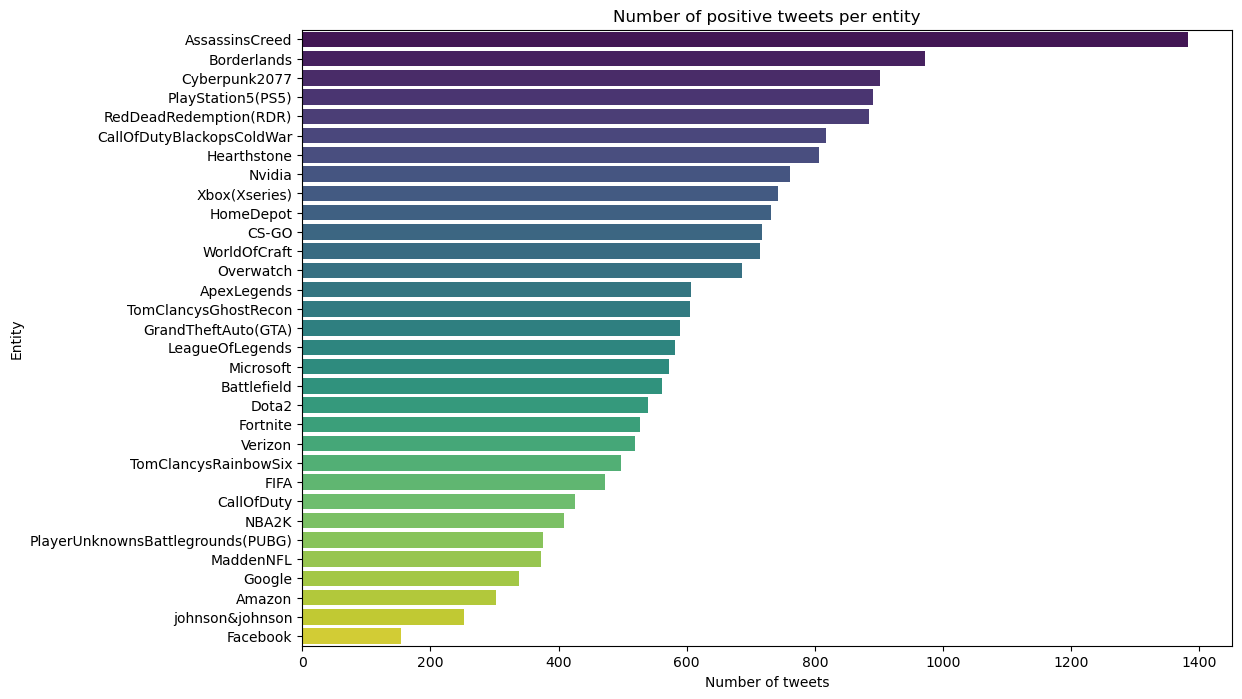

In [15]:
# companies with most positive tweets
positive_tweets = data[data['sentiment'] == 'Positive']
entity_count = positive_tweets['entity'].value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=positive_tweets, y=positive_tweets['entity'], order=entity_count.index, palette='viridis')
plt.xlabel('Number of tweets')
plt.ylabel('Entity')
plt.title('Number of positive tweets per entity')
plt.show()

/tmp/ipykernel_53038/2324249736.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=negative_tweets, y=negative_tweets['entity'], order=entity_count.index, palette='viridis')


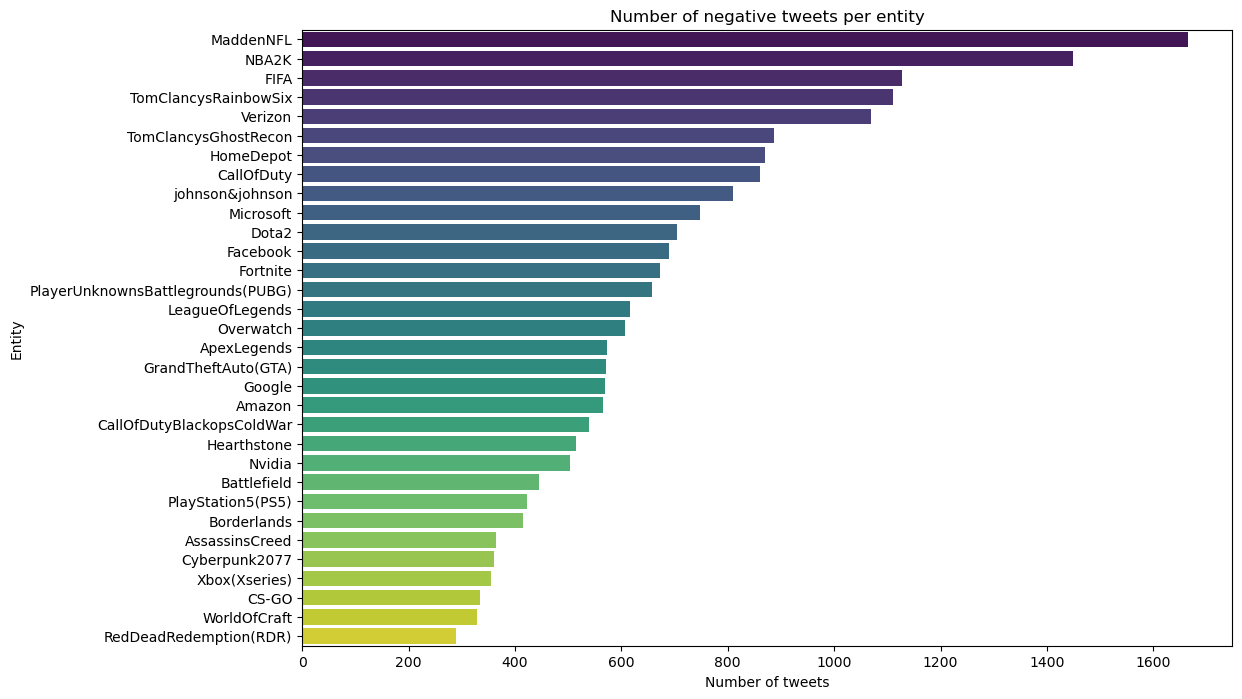

In [16]:
# companies with most negative tweets
negative_tweets = data[data['sentiment'] == 'Negative']
entity_count = negative_tweets['entity'].value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=negative_tweets, y=negative_tweets['entity'], order=entity_count.index, palette='viridis')
plt.xlabel('Number of tweets')
plt.ylabel('Entity')
plt.title('Number of negative tweets per entity')
plt.show()
